<h2 align="center" style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Optimization of Dietary Assessment Using Random Forest and Linear Regression</h2>

<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Import Libraries</h3>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Load Dataset</h3>

In [2]:
dfs = []

for i in range(1, 6):
    df = pd.read_csv(f'datasets/FINAL FOOD DATASET/FOOD-DATA-GROUP{i}.csv')
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Dataset Preview</h3>

In [3]:
# View the first five rows of the dataset
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [4]:
# View the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          2395 non-null   int64  
 1   Unnamed: 0            2395 non-null   int64  
 2   food                  2395 non-null   object 
 3   Caloric Value         2395 non-null   int64  
 4   Fat                   2395 non-null   float64
 5   Saturated Fats        2395 non-null   float64
 6   Monounsaturated Fats  2395 non-null   float64
 7   Polyunsaturated Fats  2395 non-null   float64
 8   Carbohydrates         2395 non-null   float64
 9   Sugars                2395 non-null   float64
 10  Protein               2395 non-null   float64
 11  Dietary Fiber         2395 non-null   float64
 12  Cholesterol           2395 non-null   float64
 13  Sodium                2395 non-null   float64
 14  Water                 2395 non-null   float64
 15  Vitamin A            

<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Dataset Cleaning</h3>

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Drop Unnamed index columns
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [7]:
# Confirm index columns have been dropped
df.head(3)

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.0,2.9,1.3,0.2,0.8,0.5,0.9,0.0,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07
1,neufchatel cheese,215,19.4,10.9,4.9,0.8,3.1,2.7,7.8,0.0,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.10
2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.0,0.9,3.4,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.40


<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Exploratory Data Analysis</h3>

In [8]:
sns.set_style('darkgrid')

#### **Distribution of Calorie and Fat**

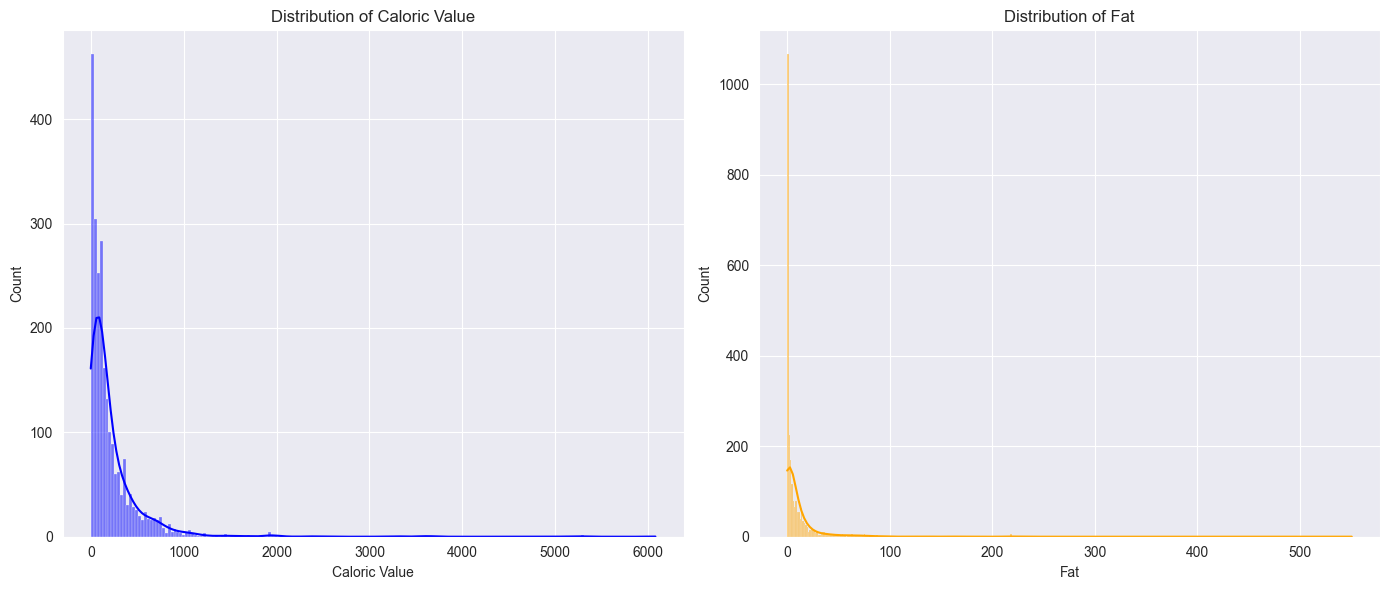

In [9]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribution of Caloric Value
sns.histplot(df['Caloric Value'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Caloric Value')

# Distribution of Fat
sns.histplot(df['Fat'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Fat')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


The distributions of caloric value and fat content are both right-skewed, indicating that most foods in the dataset have low to moderate calorie (clustering between 0-1000 calories) and fat levels (below 100g), while a small subset of items, likely processed or energy-dense foods, contribute to the higher ranges extending to 6000 calories and 500g fat respectively. This skewness highlights the presence of outliers and suggests that using the median, rather than the mean, may better represent typical foods in the dataset

#### **Pair Plot for Fat, Sugars, Protein and their Calorie Value**

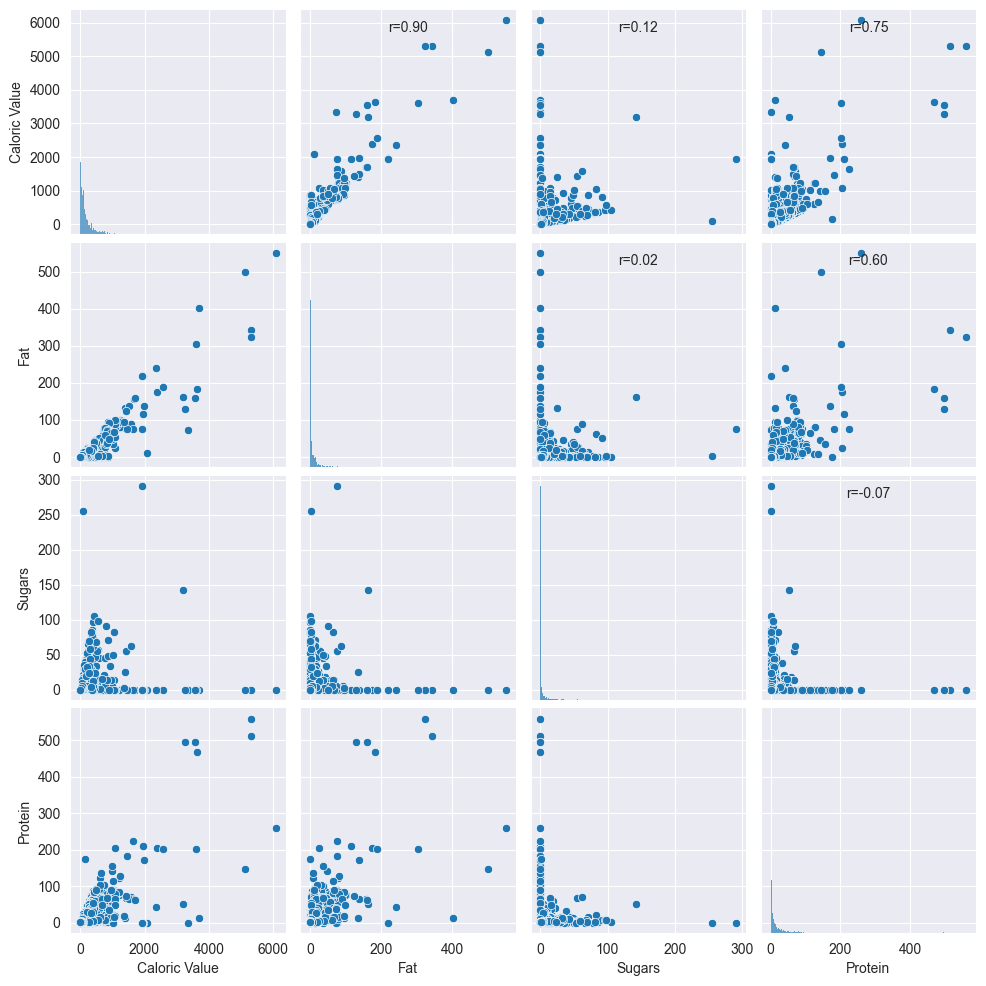

In [10]:
# Compute correlations
selected_columns = ['Caloric Value', 'Fat', 'Sugars', 'Protein']
corr = df[selected_columns].corr()

g = sns.pairplot(df[selected_columns])

# Add correlation coefficients
for i, j in zip(*np.triu_indices_from(corr, k=1)):
    ax = g.axes[i, j]
    ax.annotate(f"r={corr.iloc[i, j]:.2f}", (0.5, 0.9), xycoords='axes fraction', ha='center')
plt.show()

This scatter plot matrix shows the relationships between Caloric Value, Fat, Sugars, and Protein content in foods, with correlation coefficients (r) displayed. The strongest positive correlation (r=0.90) exists between Caloric Value and Fat, indicating that higher-fat foods tend to be more caloric. There's also a moderately strong positive correlation between Caloric Value and Protein (r=0.75), suggesting that protein-rich foods generally have higher calories. Interestingly, there's virtually no correlation between Sugars and Fat (r=0.02) or Sugars and Protein (r=-0.07), implying that a food's sugar content is largely independent of its fat and protein content. The distributions along the diagonal reinforce our earlier observation of right-skewed distributions for all these nutrients, with most foods having relatively low values and a few outliers with very high content.

#### **Analysis of Nutritional Density**

In [11]:
food_groups = df.groupby('food').mean().reset_index()

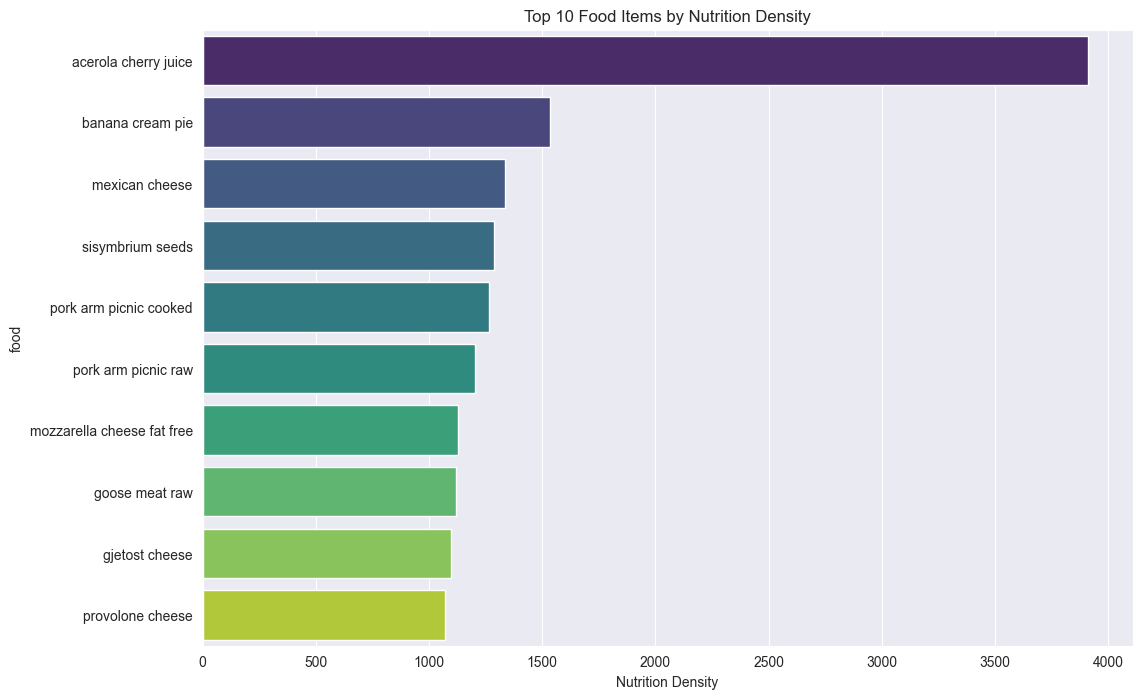

In [12]:
top_nutrition_density_foods = food_groups.sort_values(by='Nutrition Density', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Nutrition Density', y='food', data=top_nutrition_density_foods, palette='viridis')
plt.title('Top 10 Food Items by Nutrition Density')
plt.show()

Acerola cherry juice stands out dramatically at the top with the highest nutrition density (around 3800), significantly higher than all other foods. The remaining top foods cluster between nutrition density values of 1000-2000, with banana cream pie and Mexican cheese following as distant second and third. Notably, the list includes several dairy products (Mexican cheese, mozzarella cheese fat free, gjetost cheese, provolone cheese), two variations of pork arm picnic (raw and cooked), and some unique items like sisymbrium seeds and goose meat raw. This suggests that dairy products and certain meats tend to be nutritionally dense, though the standout nutrition density of acerola cherry juice implies it's particularly rich in essential nutrients relative to its caloric content.

<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Data Preprocessing</h3>

#### **Separate Features From Target**

In [13]:
X = df.drop(columns=['Fat'],axis=1)
y = df['Fat']

#### **Encode Categorical Columns and Scale Numeric Columns**

In [14]:
num_cols = X.select_dtypes(include=np.number).columns.to_list()
cat_cols = X.select_dtypes(exclude=np.number).columns.to_list()

print(num_cols, end='\n\n')
print(cat_cols)

['Caloric Value', 'Saturated Fats', 'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density']

['food']


In [15]:
num_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [16]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
    ],
    remainder='drop',
    n_jobs=-1
)

In [17]:
X_processed = col_trans.fit_transform(X)

#### **Split Dataset Into Training and Test Set**

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=12)

<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Model Building</h3>

In [19]:
# Initialize models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)

# Train Linear Regression
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train Random Forest Regressor
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

<h3 style="background-color:#2c3e54;color:#ecf0f1;border-radius: 8px; padding:15px">Model Evaluation</h3>

In [20]:
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:\n RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}\n")
    return rmse, mae, r2

In [21]:
metrics_linear = evaluate_model(y_test, y_pred_linear, "Linear Regression")
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression:
 RMSE: 12.68, MAE: 4.28, R²: 0.84

Random Forest Regressor:
 RMSE: 6.94, MAE: 1.45, R²: 0.95



In [22]:
labels = ['Linear Regression', 'Random Forest']
rmse_values = [metrics_linear[0], metrics_rf[0]]
mae_values = [metrics_linear[1], metrics_rf[1]]

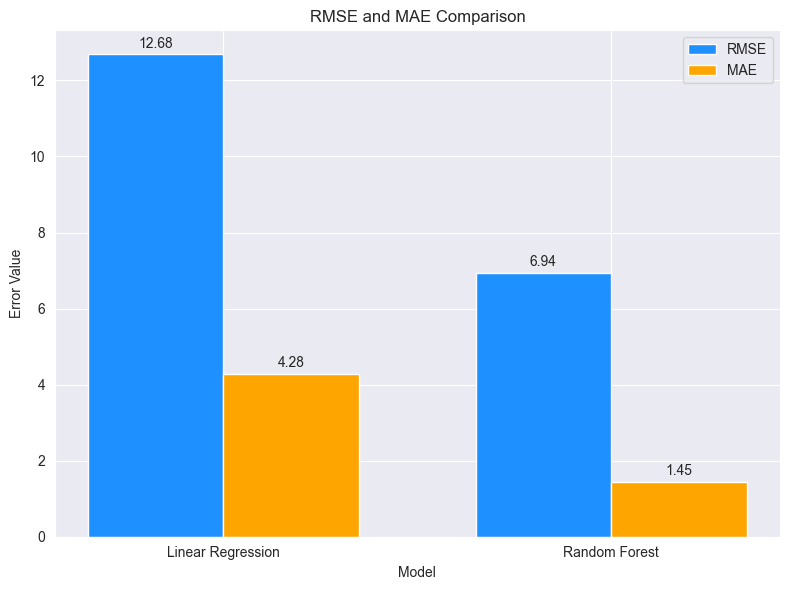

In [23]:
x = np.arange(len(labels))
width = 0.35  # Bar width

# Plot RMSE and MAE
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='dodgerblue')
bar2 = ax.bar(x + width/2, mae_values, width, label='MAE', color='orange')

# Add counts at the top of each bar
for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 0.1,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 0.1,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Error Value')
ax.set_title('RMSE and MAE Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

Random Forest significantly outperforms Linear Regression with an RMSE of 6.94 compared to Linear Regression's 12.68, showing substantially more accurate predictions overall. This improved performance is even more evident in the MAE (Mean Absolute Error), where Random Forest's MAE of 1.45 is dramatically lower than Linear Regression's 4.28. This substantial difference in both metrics suggests that Random Forest not only handles outliers better but also makes more consistently accurate predictions across the dataset. The notably lower RMSE and MAE of Random Forest makes it clearly the superior choice for predicting fat content in foods, indicating that the relationships between nutritional features and fat content are likely non-linear and better captured by Random Forest's more complex modeling approach.

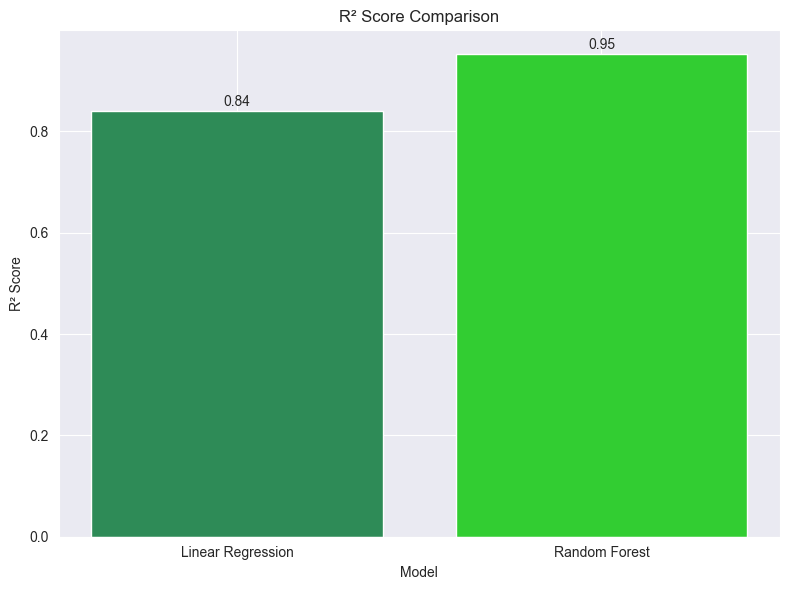

In [24]:
r2_values = [metrics_linear[2], metrics_rf[2]]

plt.figure(figsize=(8, 6))
bar3 = plt.bar(labels, r2_values, color=['seagreen', 'limegreen'])

# Add counts at the top of each bar
for bar in bar3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

Random Forest achieves a higher R² score of 0.95 compared to Linear Regression's 0.84. The R² score indicates the proportion of variance in the target variable (fat content) that is predictable from the features, with 1.0 being perfect prediction. With Random Forest explaining 95% of the variance compared to Linear Regression's 84%, this further confirms Random Forest's superior performance in predicting fat content. This high R² score, combined with the lower RMSE and MAE we saw earlier, strongly validates that Random Forest is the better model choice for this prediction task.